Setting up the Environment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("CC GENERAL.csv")

Exploratory-Data-Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

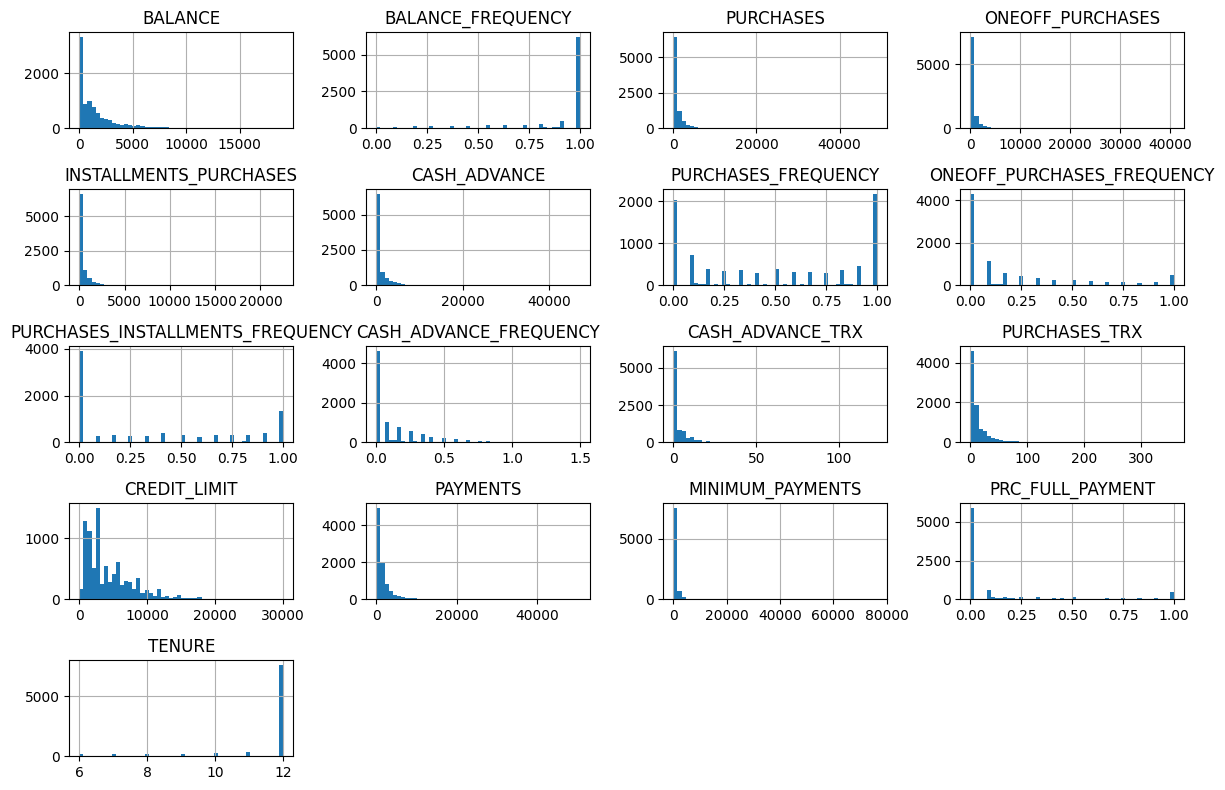

In [6]:
import matplotlib.pyplot as plt
data.hist(bins=50 , figsize=(12,8))
plt.tight_layout()
plt.show()

In [7]:
'''
from pandas.plotting import scatter_matrix

attributes = [i for i in data.columns]
scatter_matrix(data[attributes] , figsize=(12,8))
plt.tight_layout()
plt.show()
'''

'\nfrom pandas.plotting import scatter_matrix\n\nattributes = [i for i in data.columns]\nscatter_matrix(data[attributes] , figsize=(12,8))\nplt.tight_layout()\nplt.show()\n'

In [8]:
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median())

In [9]:
data = data.drop(['CUST_ID'],axis=1)

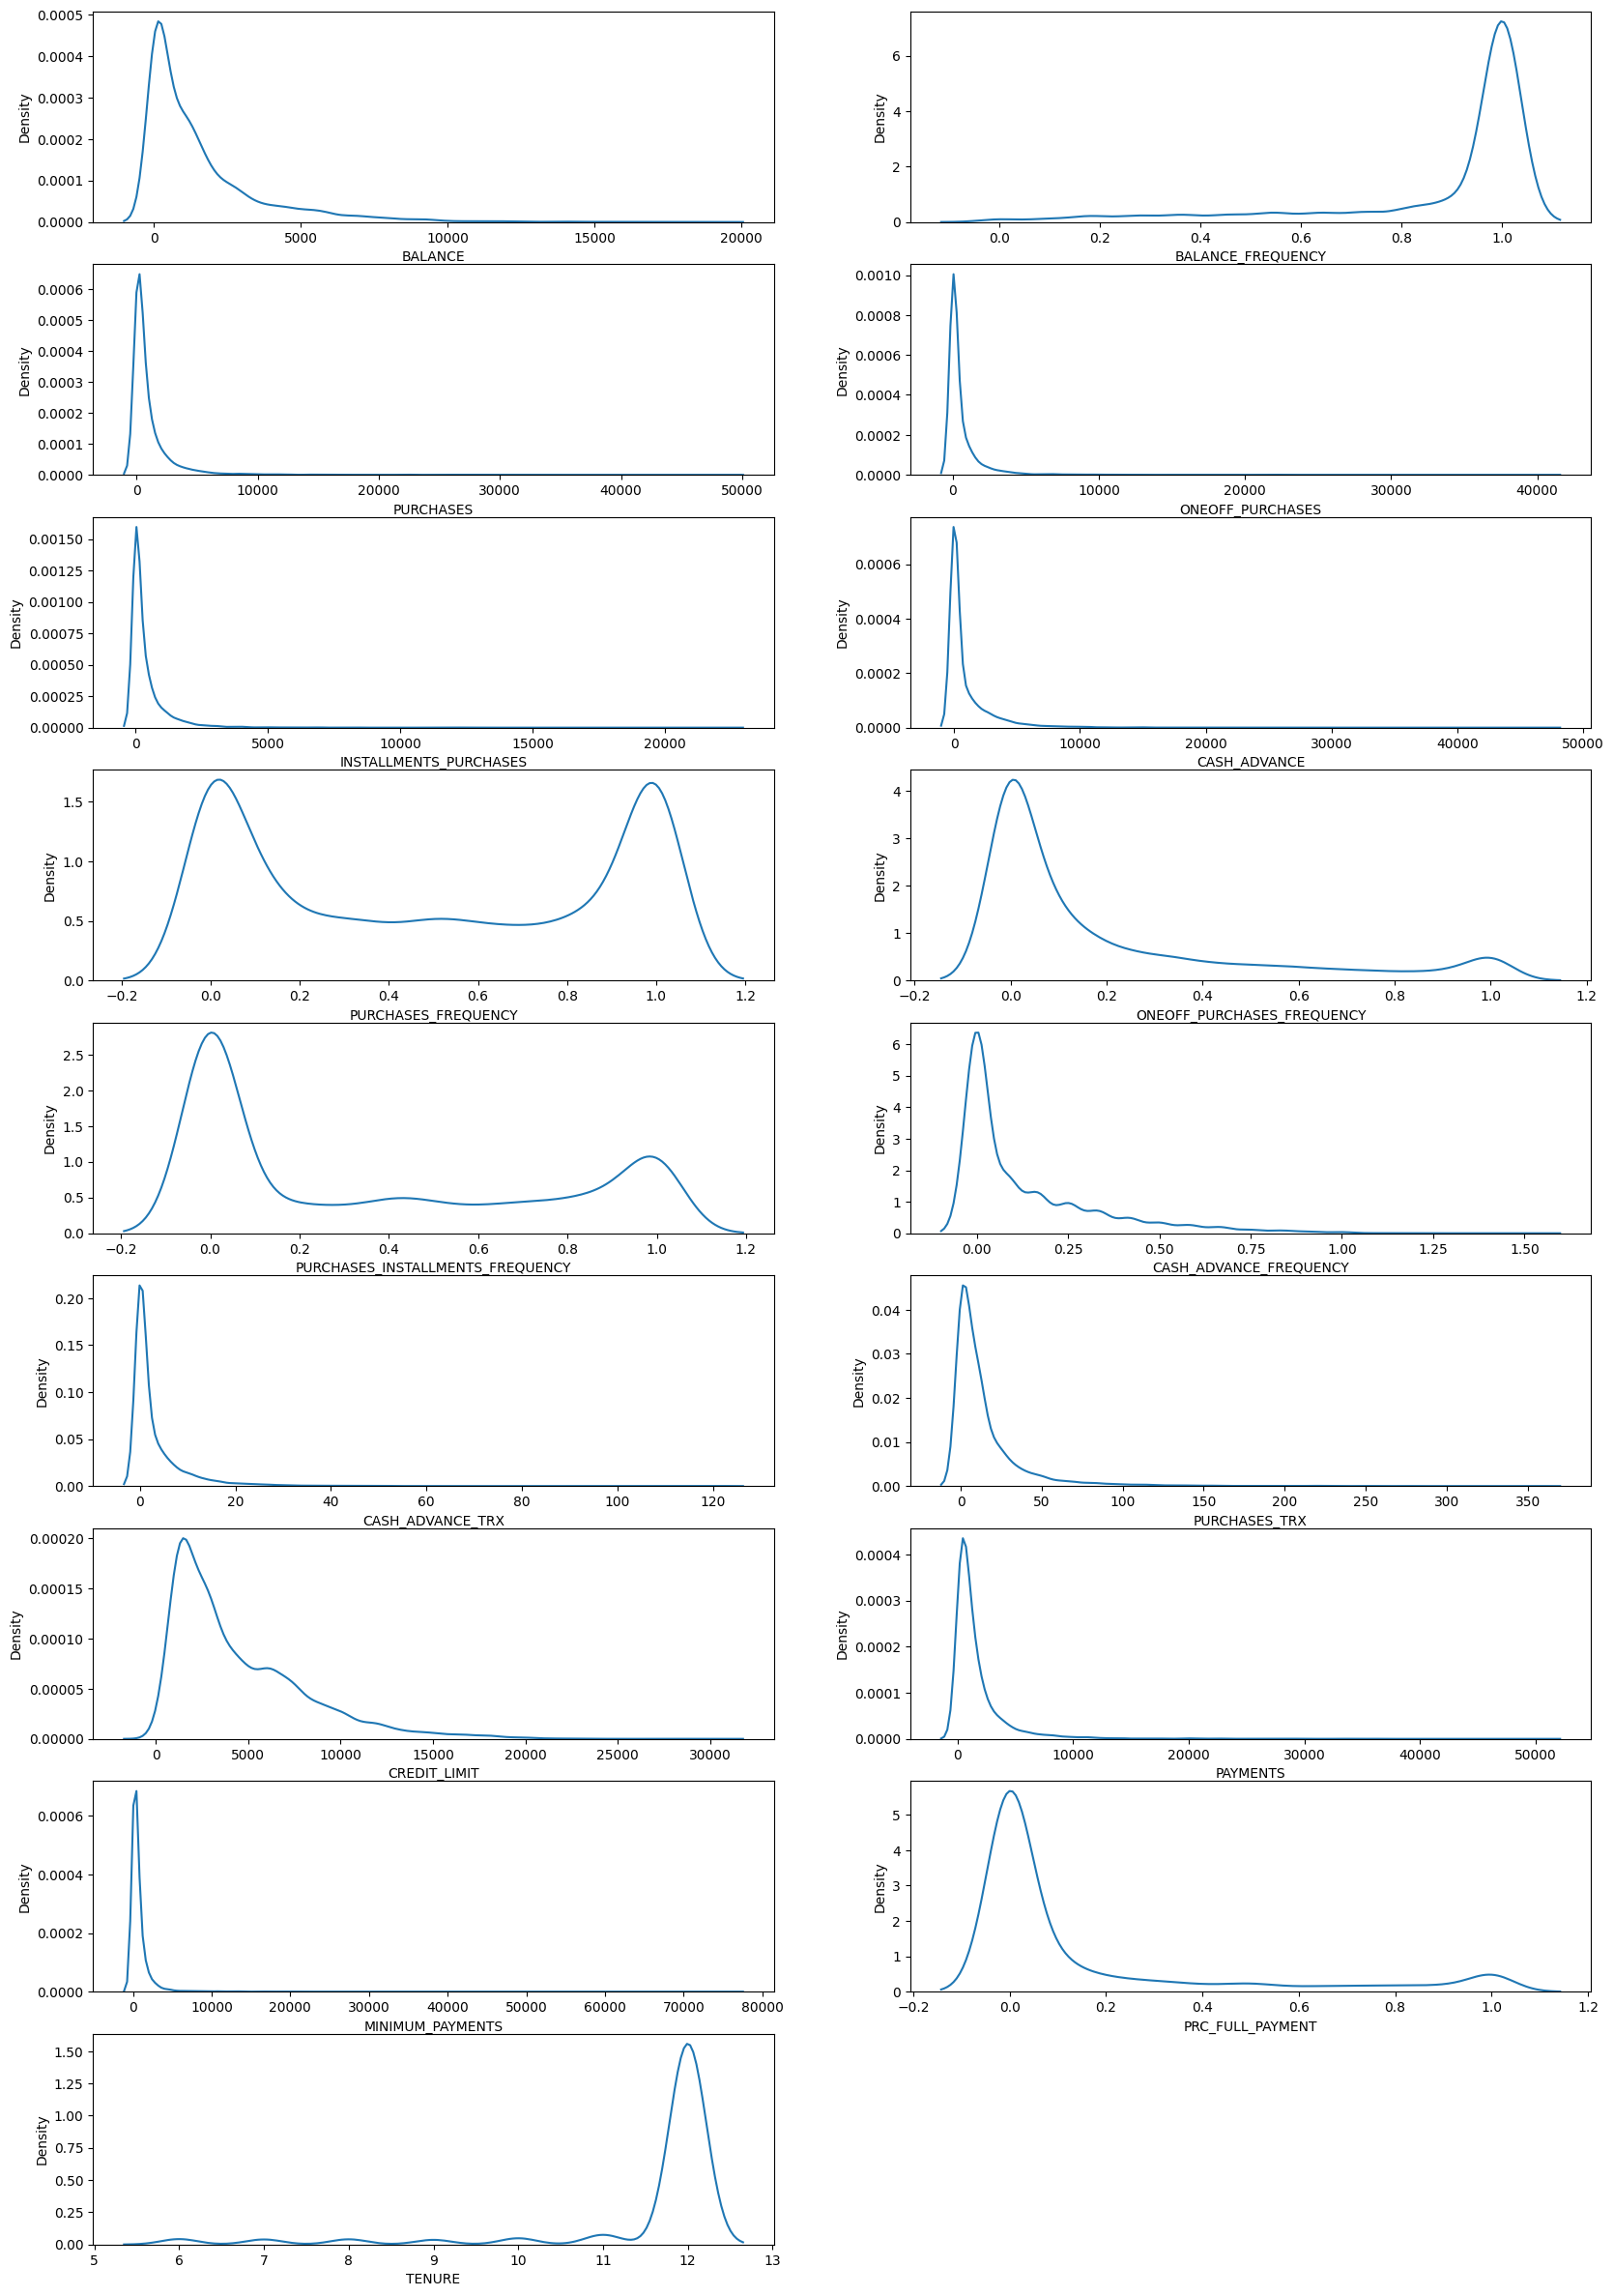

In [10]:
plt.figure(figsize=(20,30))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sn.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Feature Transformation

In [11]:
df = data.copy()
for col in data.columns:
    df[col] = np.log(1 + data[col])

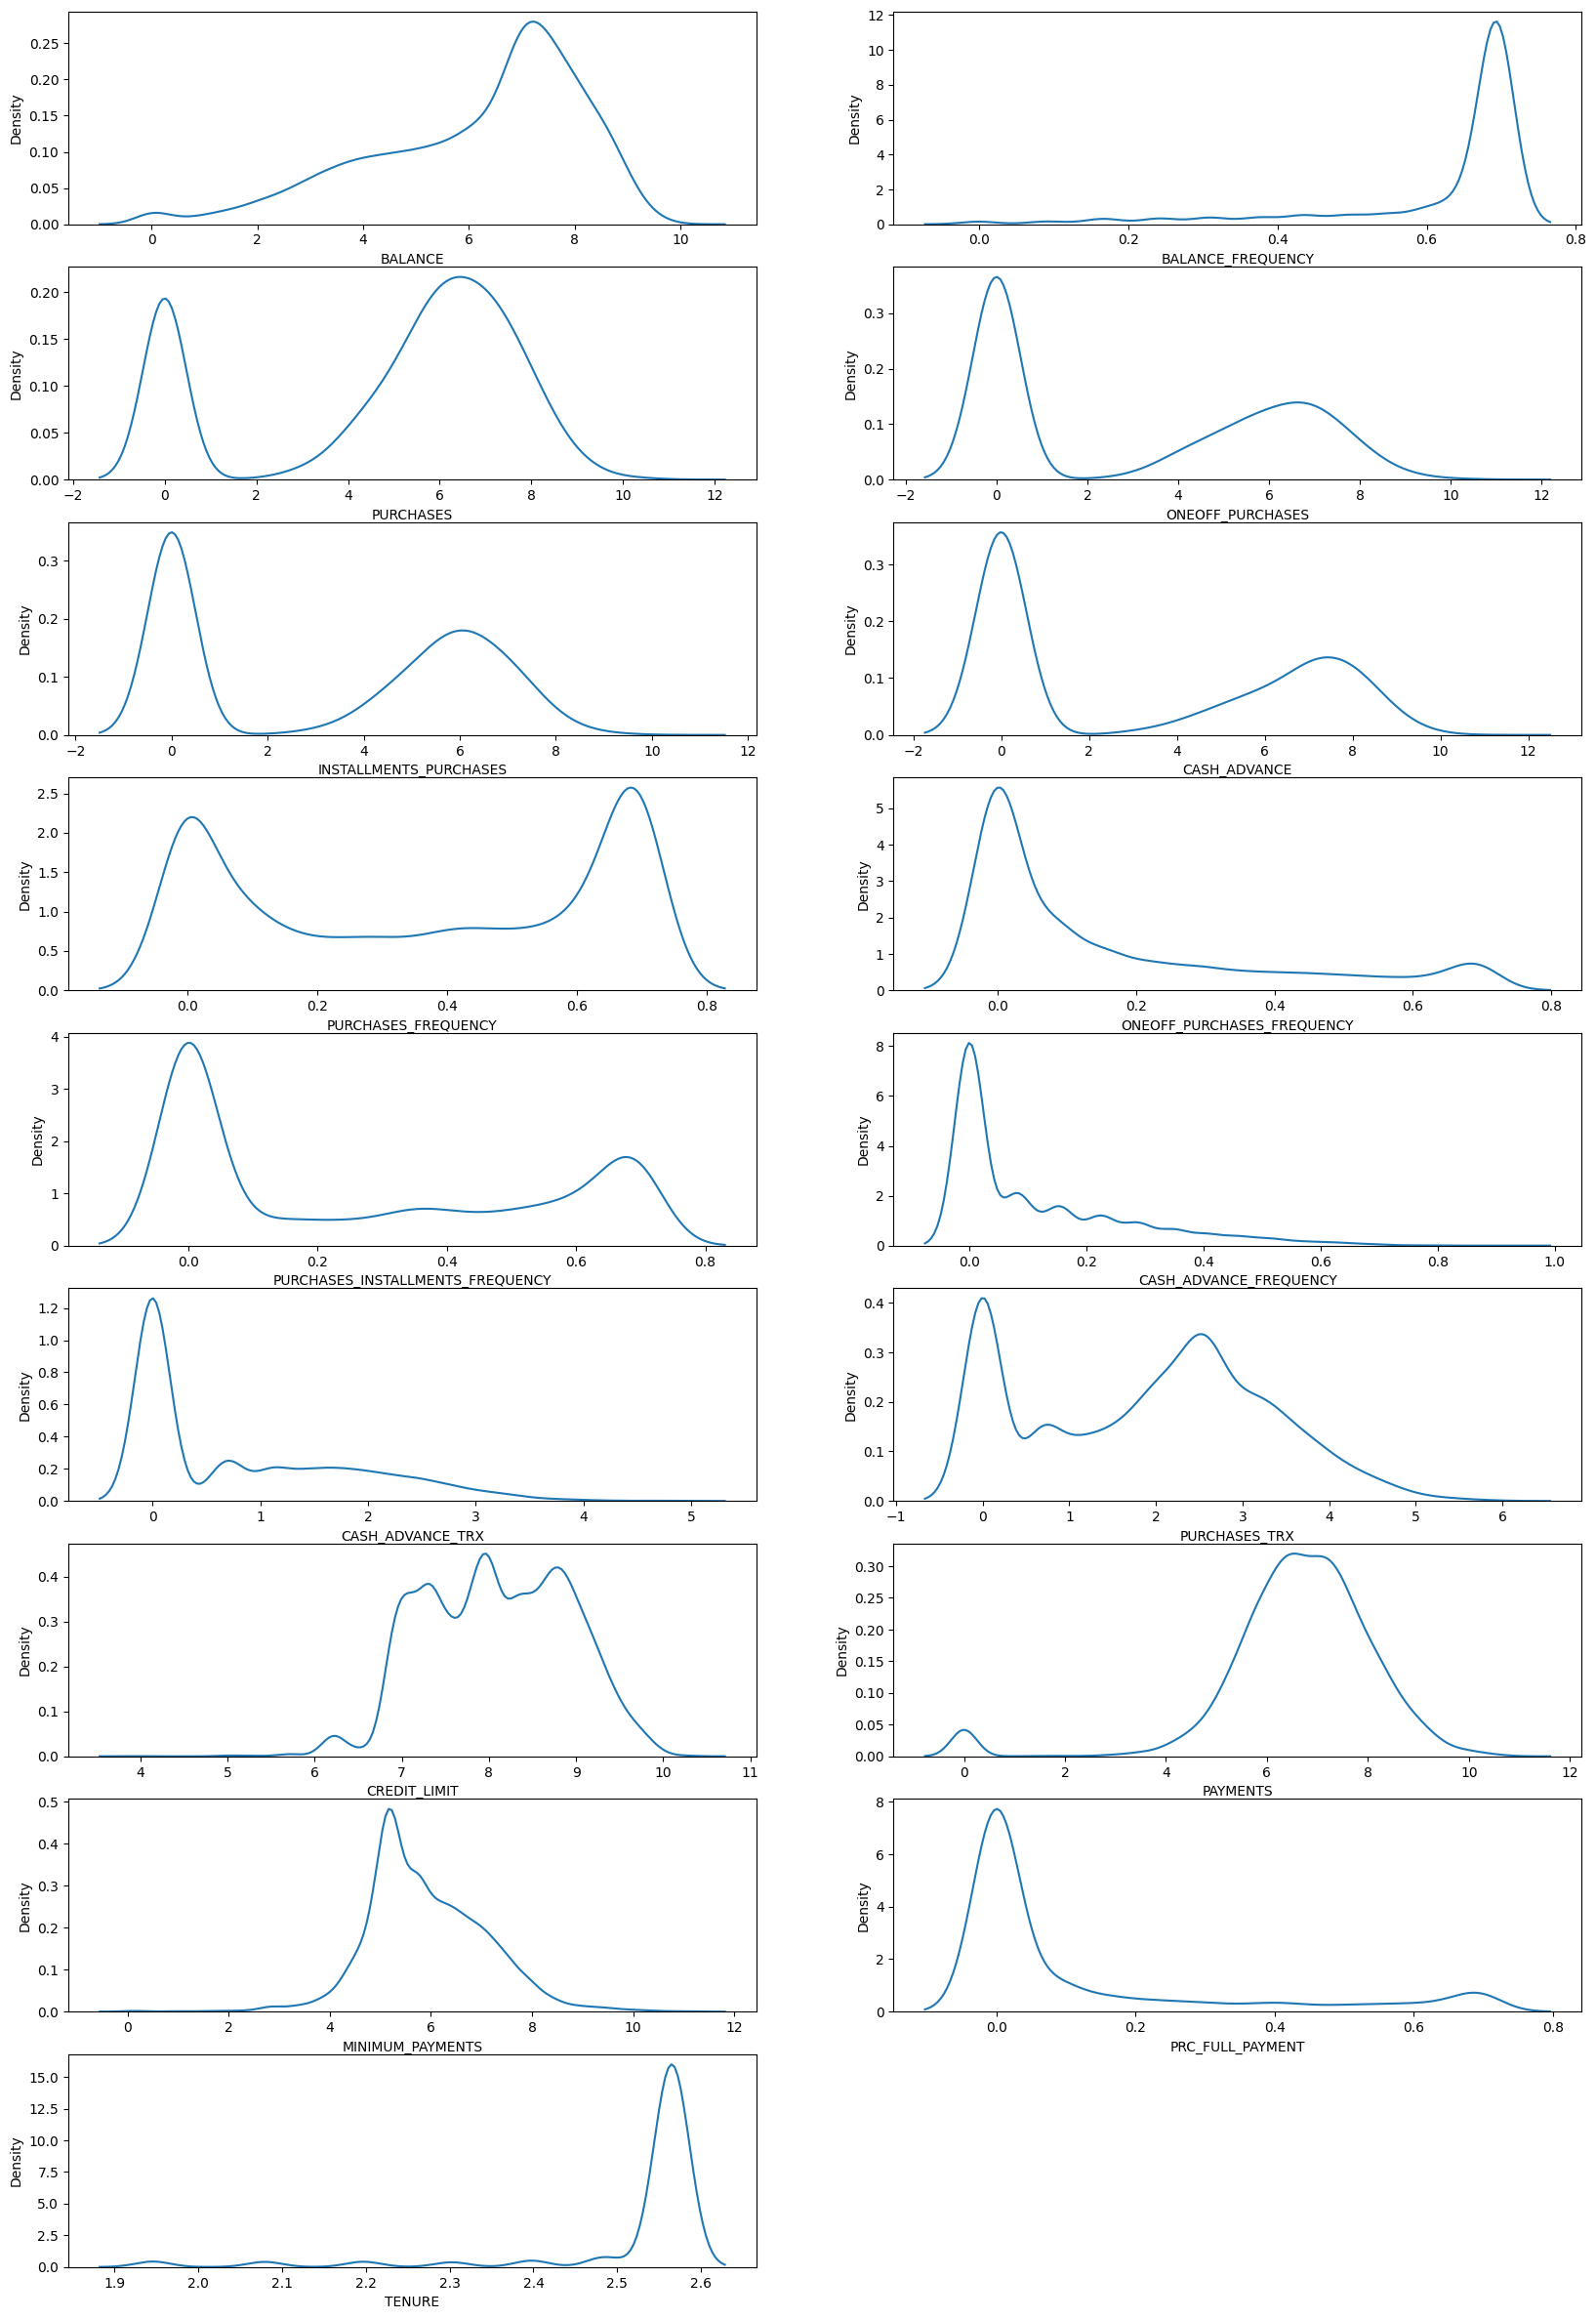

In [12]:
plt.figure(figsize=(20,30))
for i, col in enumerate(data.columns):
    ax = plt.subplot(9, 2, i+1)
    sn.kdeplot(df[col], ax=ax)
    plt.xlabel(col)
plt.show()

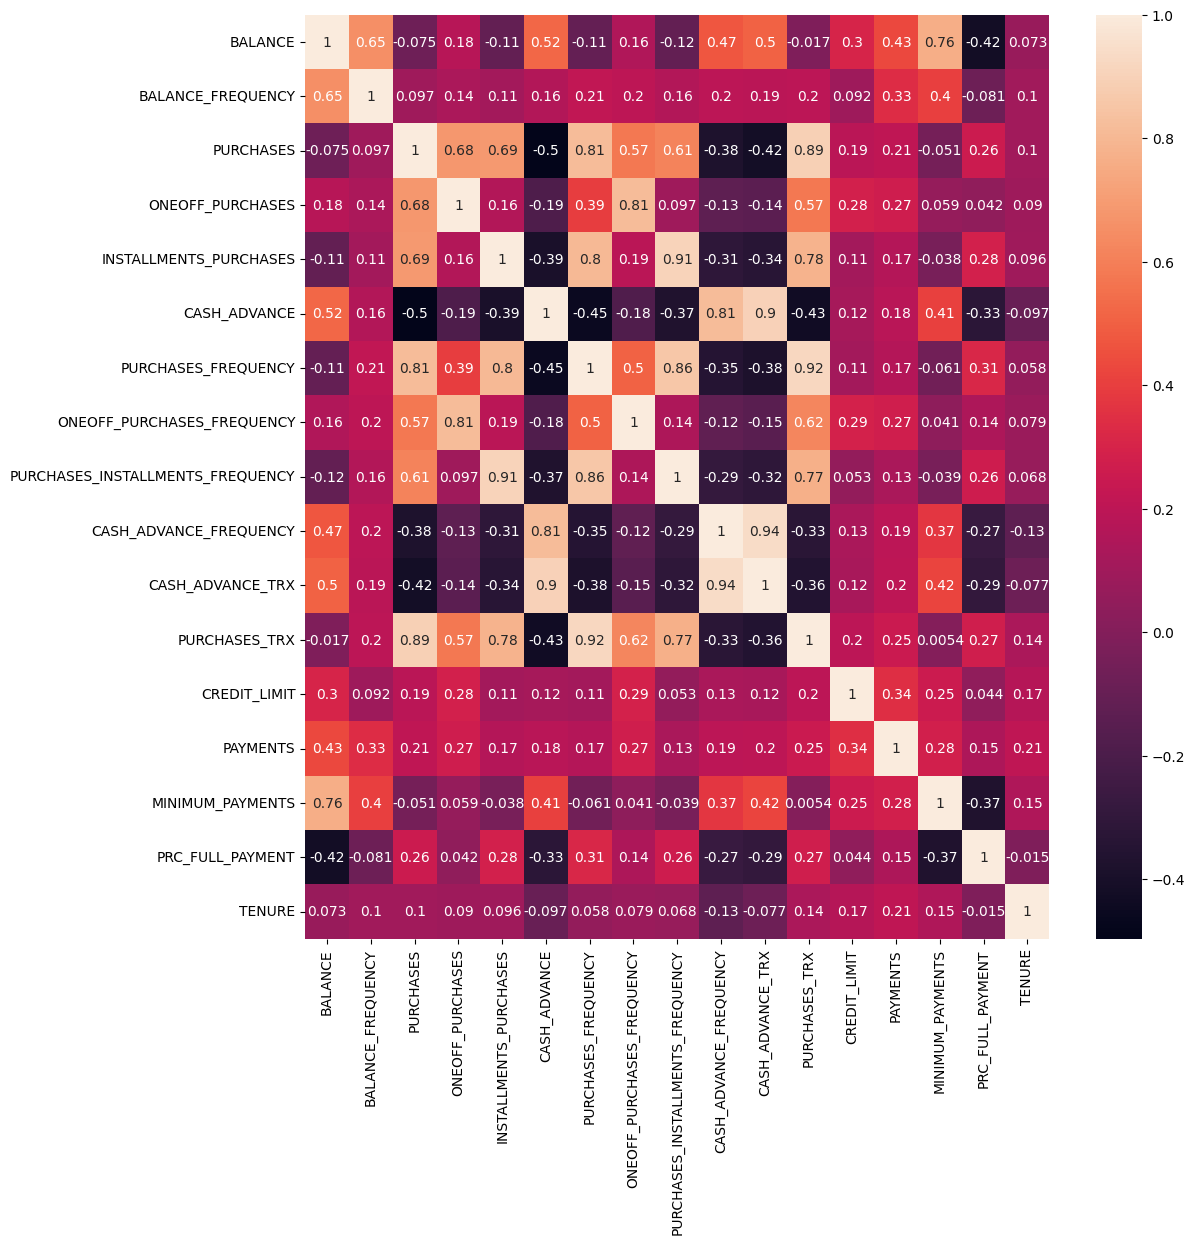

In [13]:
plt.figure(figsize=(12,12))
sn.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

Principal-Component-Analysis

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X = pca.fit_transform(df)

In [16]:
pca.n_components_

5

Clustering

In [17]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05 , min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.05, min_samples=3)

In [18]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [19]:
dbscan.core_sample_indices_

array([4373, 4964, 7284], dtype=int64)

In [20]:
from sklearn.cluster import KMeans

n_clusters=10
inertia=[]
for i in range(1,n_clusters):
    kmeans= KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_) 

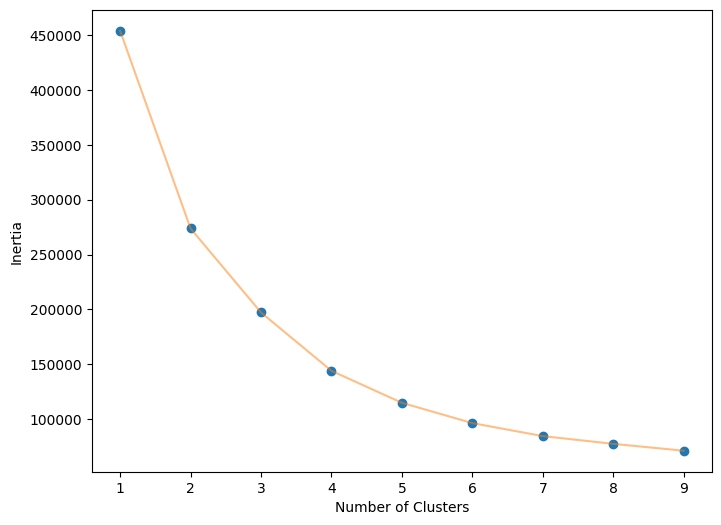

In [21]:
plt.figure(1 , figsize = (8 ,6))
plt.plot(np.arange(1 , n_clusters) , inertia , 'o')
plt.plot(np.arange(1 , n_clusters) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [22]:
kmeans= KMeans(n_clusters=5,random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [23]:
labels=kmeans.labels_

In [24]:
labels

array([3, 1, 2, ..., 3, 1, 2])

In [25]:
clusters=pd.concat([data, pd.DataFrame({'CLUSTER':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [26]:
clusters['CLUSTER'].unique()

array([3, 1, 2, 0, 4])

In [27]:
clusters['CLUSTER'].value_counts()

CLUSTER
1    2146
4    1977
3    1960
0    1649
2    1218
Name: count, dtype: int64

In [28]:
from sklearn.metrics import silhouette_score
print(f"Silhouette Coefficient: {silhouette_score(X, labels):.3f}")

Silhouette Coefficient: 0.448


Train-test-split

In [29]:
X = clusters.drop(['CLUSTER'] , axis=1)
y = clusters['CLUSTER']

In [30]:
pca = PCA(n_components=0.95)
X = pca.fit_transform(df)

In [31]:
pca.n_components_

5

In [32]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.20 , random_state=42)


In [33]:
X_train.shape

(7160, 5)

In [34]:
from sklearn.metrics import accuracy_score

Model Evaluation

In [35]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(C=30 , random_state=42)
log_clf.fit(X_train , y_train)
y_pred = log_clf.predict(X_test)

log_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {log_acc} %")

Accuracy of the model : 99.83240223463687 %


In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train , y_train)
y_pred = knn_clf.predict(X_test)

knn_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {knn_acc} %")


Accuracy of the model : 98.10055865921787 %


In [37]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=30 , random_state=42)
svm_clf.fit(X_train , y_train)
y_pred = svm_clf.predict(X_test)

svm_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {svm_acc} %")

Accuracy of the model : 97.09497206703911 %


In [38]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train , y_train)
y_pred = nb_clf.predict(X_test)

nb_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {nb_acc} %")

Accuracy of the model : 96.75977653631284 %


In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=10 , random_state=42)
rf_clf.fit(X_train , y_train)
y_pred = rf_clf.predict(X_test)

rf_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {rf_acc} %")

Accuracy of the model : 98.88268156424581 %


In [40]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(n_estimators=100, max_depth=10 , random_state=42)
xgb_clf.fit(X_train , y_train)
y_pred = xgb_clf.predict(X_test)

xgb_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {xgb_acc} %")

Accuracy of the model : 99.10614525139665 %


In [41]:
import lightgbm as lgbm

lgbm_clf = lgbm.LGBMClassifier(n_estimators=100, max_depth=10 , random_state=42)
lgbm_clf.fit(X_train , y_train)
y_pred = lgbm_clf.predict(X_test)

lgbm_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {lgbm_acc} %")


Accuracy of the model : 99.05027932960894 %


In [42]:
from sklearn.ensemble import AdaBoostClassifier

adb_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
adb_clf.fit(X_train , y_train)
y_pred = adb_clf.predict(X_test)

adb_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {adb_acc} %")


Accuracy of the model : 74.80446927374301 %


In [43]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_train , y_train)
y_pred = et_clf.predict(X_test)

et_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {et_acc} %")

Accuracy of the model : 98.93854748603353 %


In [44]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
hgb_clf.fit(X_train , y_train)
y_pred = hgb_clf.predict(X_test)

hgb_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {hgb_acc} %")

Accuracy of the model : 98.93854748603353 %


Model Selection

In [45]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN' , 'Linear SVC' , 'GaussianNB' , 'RandomForest' , 'XGBoost' , 'LightGBM' , 'AdaBoost' , 'ExtraTrees' , 'HistGradientBoosting'],
    'Score': [log_acc , knn_acc , svm_acc , nb_acc , rf_acc , xgb_acc , lgbm_acc , adb_acc , et_acc , hgb_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,99.832402
5,XGBoost,99.106145
6,LightGBM,99.050279
8,ExtraTrees,98.938547
9,HistGradientBoosting,98.938547
4,RandomForest,98.882682
1,KNN,98.100559
2,Linear SVC,97.094972
3,GaussianNB,96.759777
7,AdaBoost,74.804469


Stacking

In [46]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators = [
        ('Logistic Regression ',log_clf),
        ('LightGBM ',lgbm_clf),
        ('Extra Trees', et_clf),
        ('GaussianNB' , nb_clf)
    ],
    final_estimator = xgb_clf , cv = 5
)
stacking_clf.fit(X_train , y_train)


StackingClassifier(cv=5,
                   estimators=[('Logistic Regression ',
                                LogisticRegression(C=30, random_state=42)),
                               ('LightGBM ',
                                LGBMClassifier(max_depth=10, random_state=42)),
                               ('Extra Trees',
                                ExtraTreesClassifier(random_state=42)),
                               ('GaussianNB', GaussianNB())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_byn...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=10, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 objective='multi:softprob',
                                                 predictor=None, ...))

In [47]:
y_pred = stacking_clf.predict(X_test)
stacking_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {stacking_acc} %")

Accuracy of the model : 99.72067039106145 %


Error Analysis

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00       422
           2       1.00      0.99      0.99       257
           3       1.00      1.00      1.00       382
           4       1.00      1.00      1.00       402

    accuracy                           1.00      1790
   macro avg       1.00      1.00      1.00      1790
weighted avg       1.00      1.00      1.00      1790



In [49]:
from sklearn.metrics import balanced_accuracy_score

acc = balanced_accuracy_score(y_test , y_pred)*100
print(f"Balanced Accuracy of the model : {acc} %")

Balanced Accuracy of the model : 99.68108863241947 %


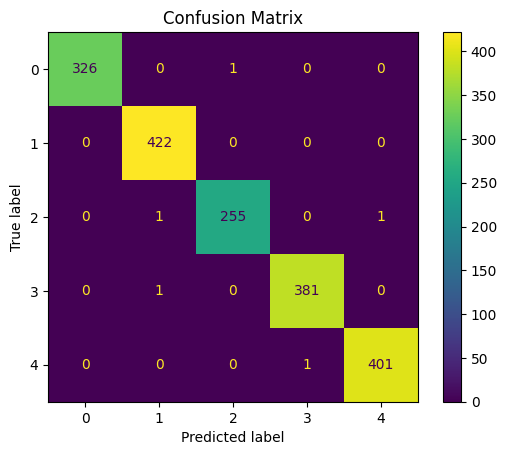

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)
plt.title("Confusion Matrix")
plt.show()